<a href="https://colab.research.google.com/github/Lesiazhou/QM2/blob/qm2-groupwork/simple_linear_salinity_vs_ndvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ee
import pandas as pd
import numpy as np
from datetime import datetime

ee.Authenticate()
ee.Initialize(project='yokomultilinear')

In [ ]:
roi = ee.Geometry.Polygon([
    [
        [60.286329088587394, 47.05784753424885],
        [61.8734050779542, 46.717316850454495],
        [62.242492517342725, 46.04898165120849],
        [62.42703623703642, 45.6311486297343],
        [62.18712940143365, 45.229675811475516],
        [61.781133218107925, 44.67462786656117],
        [60.9506864794846, 43.9882091130184],
        [60.70155245789806, 43.22656261187322],
        [59.81988922233293, 42.42319084197277],
        [59.24030351715686, 42.34073789685709],
        [58.695063631546304, 42.48021021361154],
        [58.42029707501882, 42.92192144563498],
        [58.19275602039386, 43.23863233263961],
        [58.10514887171084, 43.69172846564163],
        [57.82224913104005, 44.462076648787814],
        [57.90985627972185, 44.98874927009652],
        [58.233328828697466, 45.61914032817458],
        [58.62419149204436, 46.11186668739606],
        [59.311510532225725, 46.59177711420847],
        [59.796719355690755, 46.77670032142652],
        [60.26845015628146, 47.04830692107981]
    ]
])

In [ ]:
modis = ee.ImageCollection('MODIS/006/MOD13Q1').filterBounds(roi)
avhrr = ee.ImageCollection('NOAA/CDR/AVHRR/NDVI/V5').filterBounds(roi).filterDate('1980-01-01', '1998-12-31')


In [ ]:
def extract_pixel_ndvi(image):
    ndvi = image.select('NDVI')
    samples = ndvi.addBands(image.metadata('system:time_start','date')).sample(
        region=roi,
        scale=500,
        projection=ndvi.projection(),
        geometries=True
    )
    return samples

In [ ]:
data = []
avhrr_ndvi = avhrr.map(lambda image: image.select('NDVI').multiply(0.0001))

Combining 2 datasets as there is no dataset with continuous data from 1980s till 2004 (dam built in 200

In [ ]:
ee.Authenticate()
ee.Initialize(project='yokomultilinear')



# AVHRR GAC NDVI dataset (1980-1998)
avhrr_ndvi = ee.ImageCollection('NOAA/CDR/AVHRR/NDVI/V5').filterBounds(roi)

# MODIS dataset (2000-2004)
modis_ndvi = ee.ImageCollection('MODIS/006/MOD13Q1').filterBounds(roi)

def extract_pixel_ndvi(image):
    ndvi = image.select('NDVI')
    samples = ndvi.addBands(image.metadata('system:time_start', 'date')).sample(
        region=roi,
        scale=5000,  # Adjust scale
        projection=ndvi.projection(),
        geometries=True
    )
    return samples

yearly_data = []

# Extract yearly average NDVI from AVHRR (1980-1999)
for year in range(1980, 2000):
    yearly_avhrr = avhrr_ndvi.filterDate(str(year) + '-01-01', str(year) + '-12-31')

    if yearly_avhrr.size().getInfo() > 0:
        # Mask fill values
        yearly_avhrr = yearly_avhrr.map(lambda image: image.updateMask(image.select('NDVI').neq(-32768)))

        # Calculate yearly average NDVI
        yearly_mean_ndvi = yearly_avhrr.mean().clip(roi).reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=roi,
            scale=5000
        ).get('NDVI')

        ndvi_value = yearly_mean_ndvi.getInfo()
        # Rescale AVHRR NDVI
        ndvi_value = (ndvi_value / 2550)

        # Optional: Filter outliers or extreme values here (using thresholds, IQR, etc.)

        yearly_data.append([year, ndvi_value, 'AVHRR'])
    else:
        print(f"No AVHRR images found for year {year}. Skipping...")

# Extract yearly average NDVI from MODIS (2000-2004)
for year in range(2000, 2005):
    yearly_modis = modis_ndvi.filterDate(str(year) + '-01-01', str(year) + '-12-31')

    if yearly_modis.size().getInfo() > 0:
        # Calculate yearly average NDVI
        yearly_mean_ndvi = yearly_modis.mean().clip(roi).reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=roi,
            scale=5000  # Adjust scale
        ).get('NDVI')

        ndvi_value = yearly_mean_ndvi.getInfo()
        # Rescale MODIS NDVI (original data is between 0 and 10000)
        ndvi_value = ndvi_value / 10000

        yearly_data.append([year, ndvi_value, 'MODIS'])
    else:
        print(f"No MODIS images found for year {year}. Skipping...")

# Create a pandas DataFrame
df = pd.DataFrame(yearly_data, columns=['year', 'ndvi', 'source'])

# Print the DataFrame
print(df)

No AVHRR images found for year 1980. Skipping...
    year      ndvi source
0   1981  0.456717  AVHRR
1   1982  0.302966  AVHRR
2   1983  0.313053  AVHRR
3   1984  0.301992  AVHRR
4   1985  0.317433  AVHRR
5   1986  0.285627  AVHRR
6   1987  0.310313  AVHRR
7   1988  0.311865  AVHRR
8   1989  0.253266  AVHRR
9   1990  0.300415  AVHRR
10  1991  0.317312  AVHRR
11  1992  0.305150  AVHRR
12  1993  0.320836  AVHRR
13  1994  0.344549  AVHRR
14  1995  0.364707  AVHRR
15  1996  0.337529  AVHRR
16  1997  0.385210  AVHRR
17  1998  0.360696  AVHRR
18  1999  0.366219  AVHRR
19  2000  0.076657  MODIS
20  2001  0.063584  MODIS
21  2002  0.091257  MODIS
22  2003  0.090325  MODIS
23  2004  0.095024  MODIS


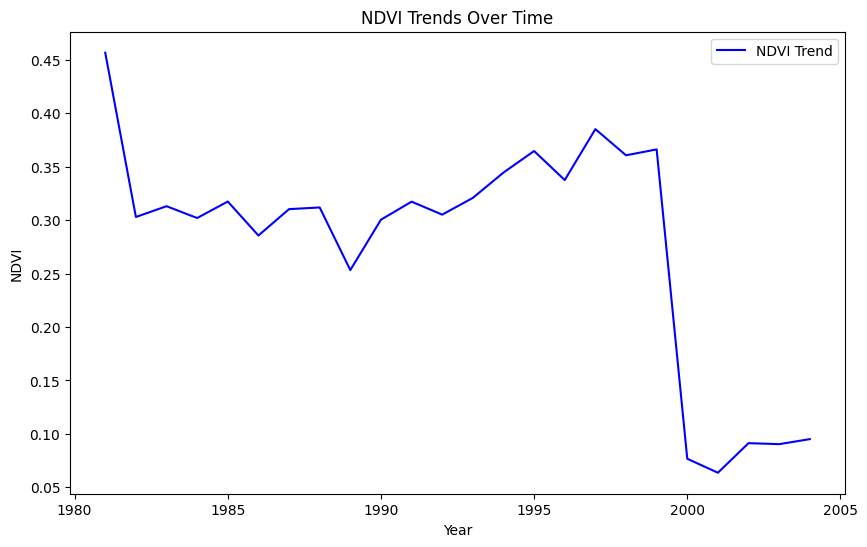

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot combined data with connected lines
ax.plot(df['year'], df['ndvi'], label='NDVI Trend', color='blue')  # Plot combined data

# Set plot title and labels
ax.set_title('NDVI Trends Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('NDVI')

# Add legend
ax.legend()

# Display the plot
plt.show()

Importing data for salinity and NDVI

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salinity vs NDVI.csv to salinity vs NDVI (1).csv


In [ ]:
df=pd.read_csv('salinity vs NDVI.csv')
df.head(20)

,Year,Salinity,ndvi
0,1981,17.7,0.456717
1,1982,18.8,0.302966
2,1983,20.3,0.313053
3,1984,31.9,0.301992
4,1985,22.9,0.317433
5,1986,22.9,0.285627
6,1987,23.9,0.310313
7,1988,25.0,0.311865
8,1989,28.3,0.253266
9,1990,30.4,0.300415


In [ ]:
def filter_outliers(var, column_name='Year '):  # Add column_name as a parameter with a default value
    q1 = var.quantile(0.25)  # calculate the first quartile
    q3 = var.quantile(0.75)  # calculate the third quartile
    iqr = q3 - q1  # calculate the interquartile range
    low = q1 - 3 * iqr  # calculate the lower bound
    high = q3 + 3 * iqr  # calculate the upper bound
    filtered = (var > low) & (var < high) # filter the values that are within the bounds

    dropped_years = df.loc[~filtered, column_name].tolist() # Get dropped years based on column_name

    dropped_observations = len(var) - filtered.sum() # Count dropped observations

    print(f'Dropped {dropped_observations} observations for {column_name} with these years: {dropped_years}')  # Print dropped years

    return filtered # Return the boolean filter


ndvi_filter = filter_outliers(df['ndvi'], column_name='Year ')  # Pass column_name explicitly
df = df[ndvi_filter]  # Filter DataFrame based on NDVI outliers

Dropped 0 observations for Year  with these years: []


Results show no outliers in NDVI values

In [ ]:
summary=df.describe()
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
Year,19.0,1990.000000,5.627314,1981.000000,1985.500000,1990.000000,1994.500000,1999.000000
Salinity,19.0,31.284211,9.954299,17.700000,23.400000,30.400000,36.400000,50.600000
ndvi,19.0,0.329256,0.044155,0.253266,0.304058,0.317312,0.352623,0.456717


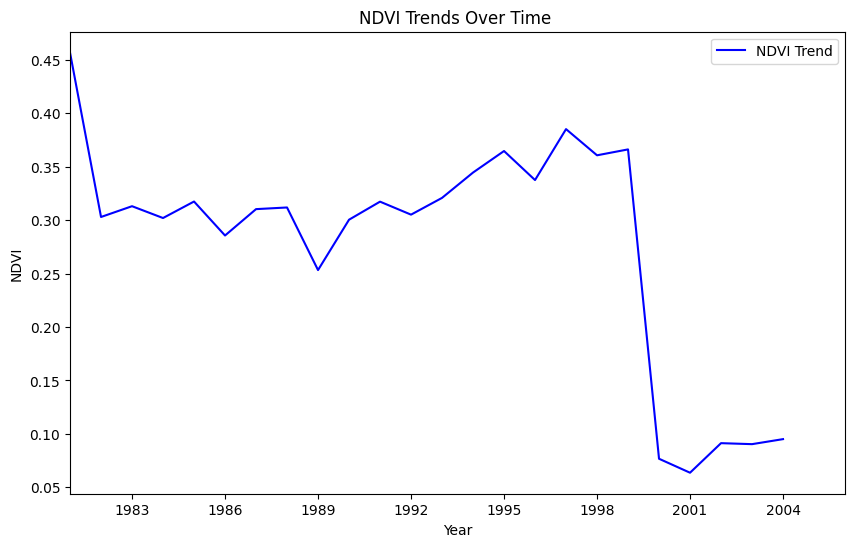

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Filter data up to 2004 (Assuming 'Year ' is the column name for years)
df_filtered = df[df['Year '] <= 2008]

# Plot the data
ax.plot(df_filtered['Year '], df_filtered['ndvi'], label='NDVI Trend', color='blue')

# Set plot title and labels
ax.set_title('NDVI Trends Over Time ')
ax.set_xlabel('Year')
ax.set_ylabel('NDVI')

# Format x-axis to show years without decimals
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Set x-axis limits explicitly
ax.set_xlim(df_filtered['Year '].min(), df_filtered['Year '].max()+2)  # Set limits to min/max of 'Year '

# Add legend
ax.legend()

# Display the plot
plt.show()

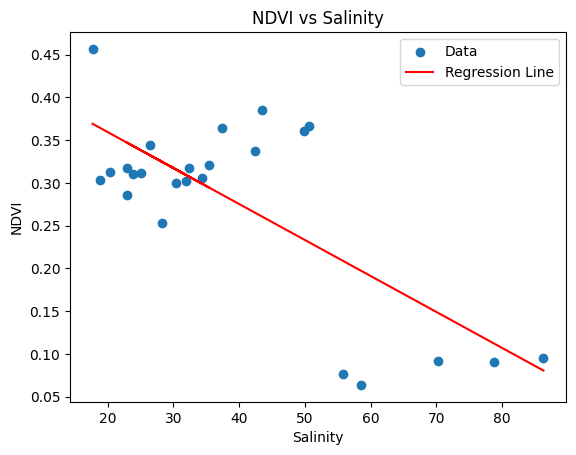

In [ ]:
plt.scatter(df['Salinity'], df['ndvi'], label='Data')
plt.plot(df['Salinity'], predictions, color='red', label='Regression Line')
plt.xlabel('Salinity')
plt.ylabel('NDVI')
plt.legend()
plt.title('NDVI vs Salinity')
plt.show()

In [ ]:
!pip install statsmodels

import statsmodels.formula.api as smf
import pandas as pd

# Create the linear regression model
model = smf.ols('ndvi ~ Salinity', data=df).fit()

# Print the model summary
print(model.summary())

# Get the predicted values
predictions = model.predict(df['Salinity'])

# Access model coefficients
intercept = model.params['Intercept']
slope = model.params['Salinity']

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")



                            OLS Regression Results                            
Dep. Variable:                   ndvi   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     25.73
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           4.42e-05
Time:                        23:39:55   Log-Likelihood:                 28.864
No. Observations:                  24   AIC:                            -53.73
Df Residuals:                      22   BIC:                            -51.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4436      0.036     12.277      0.0

#Assumptions
(Homoscedasticity and Normality is relevant in the context of linear regression)

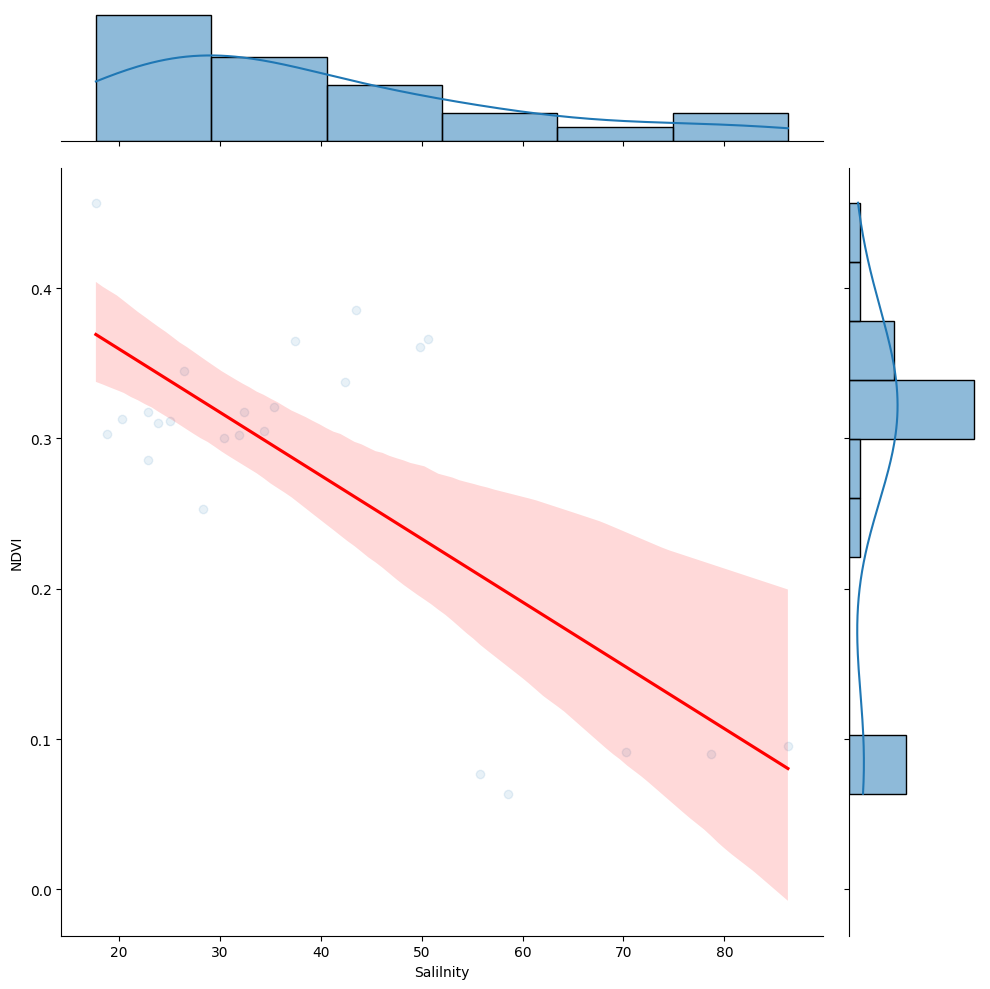

In [ ]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(data=df,
              x='Salinity',
              y='ndvi',
              kind="reg",
              scatter_kws=dict(alpha=0.1),
              line_kws=dict(color='red'),  # Corrected indentation
              height=10)

plt.xlabel('Salilnity')
plt.ylabel('NDVI')
plt.show()

 As Salinity increases, the scatter around the regression line seems to widen, especially at the higher salinity values. This suggests that the variance of NDVI (dependent variable) increases with higher Salinity values, which could indicate heteroscedasticity. Hence we need further statistical tests to prove homoscedasticity

#Breusch-Pagan test

In [ ]:
!pip install statsmodels

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# 1. Create the linear regression model
model = smf.ols('ndvi ~ Salinity', data=df).fit()

# 2. Breusch-Pagan test
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)

# 3. White test
white_test = sms.het_white(model.resid, model.model.exog)

# 4. Print the results
print("Breusch-Pagan test:")
print(f"Lagrange multiplier statistic: {bp_test[0]}")
print(f"p-value: {bp_test[1]}")
print(f"f-value: {bp_test[2]}")
print(f"f p-value: {bp_test[3]}")

Breusch-Pagan test:
Lagrange multiplier statistic: 1.6443695280930184
p-value: 0.1997270041880539
f-value: 1.6182111107761787
f p-value: 0.2166238042844801


Null Hypothesis: The Breusch-Pagan test starts with the null hypothesis that there is homoscedasticity (constant variance of the residuals).

p-value: The p-value is 0.1997, which is greater 0.05 indicates that we fail to reject the null hypothesis.

Conclusion: Based on the p-value, there is not enough statistical evidence to suggest that there is heteroscedasticity in the data. In other words, the variance of the residuals appears to be relatively constant across different levels of the predictor variable (Salinity).

The Breusch-Pagan test suggests that the data likely meets the assumption of homoscedasticity.



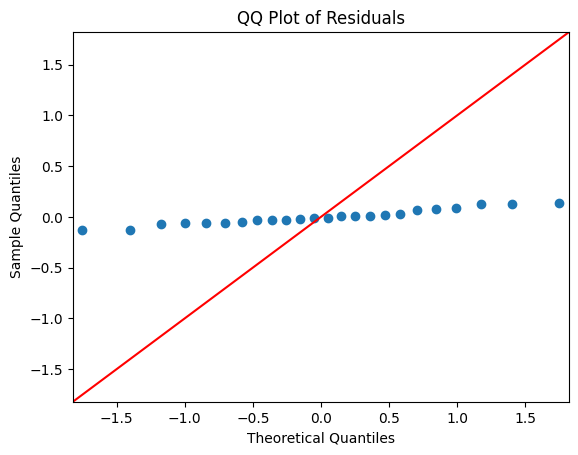

In [ ]:
fig = sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

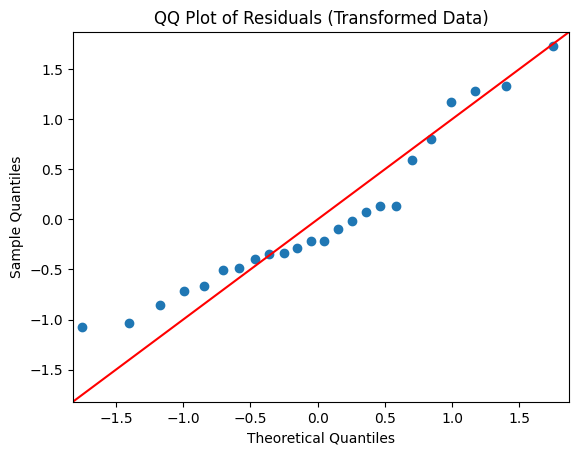

In [ ]:
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import yeojohnson


from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')  # 'box-cox' is also an option
df['ndvi_transformed'] = pt.fit_transform(df['ndvi'].values.reshape(-1, 1))

# Refit the model with transformed data
model_transformed = smf.ols('ndvi_transformed ~ Salinity', data=df).fit()

# Get residuals from the transformed model
residuals_transformed = model_transformed.resid

# Create the QQ plot
fig = sm.qqplot(residuals_transformed, line='45')
plt.title('QQ Plot of Residuals (Transformed Data)')
plt.show()

In [ ]:
!pip install statsmodels

import statsmodels.formula.api as smf
import pandas as pd

# Create the linear regression model
model = smf.ols('ndvi_transformed ~ Salinity', data=df).fit()

# Print the model summary
print(model.summary())

# Get the predicted values
predictions = model.predict(df['Salinity'])

# Access model coefficients
intercept = model.params['Intercept']
slope = model.params['Salinity']

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

                            OLS Regression Results                            
Dep. Variable:       ndvi_transformed   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     16.28
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           0.000555
Time:                        01:11:30   Log-Likelihood:                -27.409
No. Observations:                  24   AIC:                             58.82
Df Residuals:                      22   BIC:                             61.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3735      0.377      3.644      0.0